# 최근접 이웃(K-Nearest Neighbor)

* 특별한 예측 모델 없이 가장 가까운 데이터 포인트를 기반으로 예측을 수행하는 방법
* 분류와 회귀 모두 지원

![k nearest neighbor](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png)

## K 최근접 이웃 분류

* 입력 데이터 포인트와 가장 가까운 k개의 훈련 데이터 포인트가 출력
* k개의 데이터 포인트 중 가장 많은 클래스가 예측 결과

In [1]:
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler

### 붓꽃 데이터

In [3]:
iris = load_iris()

In [4]:
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['Target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
# 데이터 분리
X, y = load_iris(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)  # 평가데이터 20%

In [6]:
# 표준화
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

#### 일반적인 KNN

In [7]:
# KNN 모형 적합
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
print("학습 데이터 점수 : {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test,y_test)))

학습 데이터 점수 : 0.9833333333333333
평가 데이터 점수 : 0.9333333333333333


In [9]:
# 5-fold cross validation
cross_validate(
    estimator = KNeighborsClassifier(),
    X = X, y = y,
    cv = 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.1s finished


{'fit_time': array([0.00128698, 0.00126743, 0.00116611, 0.00101304, 0.00082922]),
 'score_time': array([0.00296402, 0.00287294, 0.00315547, 0.00291157, 0.00231338]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

#### GridSearch를 통한 KNN

+ GridSearch : 가장 우수한 성능을 보이는 모델의 하이퍼 파라미터를 찾는 것이 목적

In [10]:
# GridSearchCV
param_grid = [{"n_neighbors" : [3, 5, 7],
               "weights" : ["uniform", "distance"],
               "algorithm" : ["ball_tree", "kd_tree", "brute"]}]

In [11]:
gs = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

In [12]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=2,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [13]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)

In [14]:
print('GridSearchCV best score : {}'.format(gs.best_score_))

GridSearchCV best score : 0.9833333333333334


In [15]:
model2 = KNeighborsClassifier(algorithm='ball_tree')
model2.fit(X_train, y_train)
predict = model2.predict(X_test)

In [16]:
print(predict)

[2 2 0 2 1 2 0 1 2 1 0 0 1 1 1 0 0 0 2 2 1 1 2 1 1 2 0 1 2 1]


In [17]:
def make_meshgrid(x,y,h=.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min,x_max,h),
                       np.arange(y_min,y_max,h))
  return xx, yy

def plot_contours(clf,xx,yy,**params):
  Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx,yy,Z,**params)

  return out

In [18]:
from sklearn.manifold import TSNE

In [19]:
tsne = TSNE(n_components = 2)
X_comp = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [20]:
iris_comp_df = pd.DataFrame(data = X_comp)
iris_comp_df['Target'] = y
iris_comp_df

,0,1,Target
0,15.076582,18.967348,0
1,15.740585,21.632936,0
2,14.633329,21.326036,0
3,14.946047,21.822350,0
4,14.756077,18.889877,0
...,...,...,...
145,-5.026480,-18.191975,2
146,-6.182525,-15.041041,2
147,-5.489906,-17.323200,2
148,-6.722822,-18.990883,2


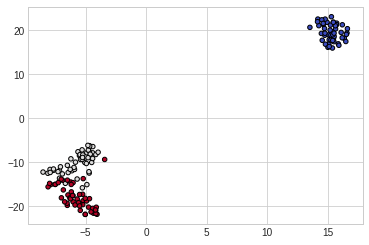

In [21]:
plt.scatter(X_comp[:, 0],X_comp[:, 1],
            c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors = "k")

In [22]:
model3 = KNeighborsClassifier()
model3.fit(X_comp,y)
predict = model3.predict(X_comp)

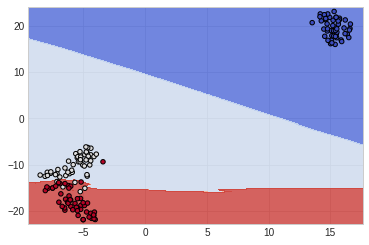

In [23]:
xx, yy = make_meshgrid(X_comp[:, 0],X_comp[:, 1])
plot_contours(model3, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:,0],X_comp[:,1],c=y,cmap=plt.cm.coolwarm,s=20, edgecolors='k')